In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lons = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
# Set Up City Data Frame

cities_df = pd.DataFrame({"City": cities})
cities_df

,City
0,mataura
1,mareeba
2,tasiilaq
3,faanui
4,vila franca do campo
...,...
590,oshnaviyeh
591,foam lake
592,pietarsaari
593,trelew


In [4]:
#Building OpenWeatehr url
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': weather_key,
    'units': 'imperial'
}

print('Beginning Data Retrieval')
print('----------------------------')

# Retrieve Data from OpenWeather
for index, row in cities_df.iterrows():
    
    city = row['City']
    
    params['q'] = city
    
    print(f"Processing Record {index} | {city}.")
    
    # assemble url and make API request
    response = requests.get(base_url, params=params)
    json_response = response.json()
    
    try:
        
        cities_df.loc[index, 'Cloudiness'] = json_response['clouds']['all']
        cities_df.loc[index, 'Country'] = json_response['sys']['country']
        cities_df.loc[index, 'Date'] = json_response['dt']
        cities_df.loc[index, 'Humidity'] = json_response['main']['humidity']
        cities_df.loc[index, 'Lat'] = json_response['coord']['lat']
        cities_df.loc[index, 'Lng'] = json_response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = json_response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = json_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")

Beginning Data Retrieval
----------------------------
Processing Record 0 | mataura.
Processing Record 1 | mareeba.
Processing Record 2 | tasiilaq.
Processing Record 3 | faanui.
Processing Record 4 | vila franca do campo.
Processing Record 5 | victoria.
Processing Record 6 | taolanaro.
City not found... skipping.
Processing Record 7 | avarua.
Processing Record 8 | isangel.
Processing Record 9 | port alfred.
Processing Record 10 | barentsburg.
City not found... skipping.
Processing Record 11 | bambous virieux.
Processing Record 12 | bubaque.
Processing Record 13 | punta arenas.
Processing Record 14 | boden.
Processing Record 15 | karakendzha.
City not found... skipping.
Processing Record 16 | hobart.
Processing Record 17 | sentyabrskiy.
City not found... skipping.
Processing Record 18 | manyana.
Processing Record 19 | longmeadow.
Processing Record 20 | yar-sale.
Processing Record 21 | lazarev.
Processing Record 22 | airai.
Processing Record 23 | bredasdorp.
Processing Record 24 | lata.


Processing Record 225 | caceres.
Processing Record 226 | san carlos de bariloche.
Processing Record 227 | bonthe.
Processing Record 228 | zavitinsk.
Processing Record 229 | lebu.
Processing Record 230 | sao filipe.
Processing Record 231 | wichita.
Processing Record 232 | porangatu.
Processing Record 233 | tilichiki.
Processing Record 234 | buraydah.
Processing Record 235 | acarau.
Processing Record 236 | port hardy.
Processing Record 237 | mutare.
Processing Record 238 | port shepstone.
Processing Record 239 | espanola.
Processing Record 240 | caohai.
Processing Record 241 | durmersheim.
Processing Record 242 | mahebourg.
Processing Record 243 | thyboron.
Processing Record 244 | thompson.
Processing Record 245 | ituni.
City not found... skipping.
Processing Record 246 | byron bay.
Processing Record 247 | atar.
Processing Record 248 | isla vista.
Processing Record 249 | azanka.
Processing Record 250 | nioro.
Processing Record 251 | khatanga.
Processing Record 252 | saleaula.
City not fo

Processing Record 449 | kapuskasing.
Processing Record 450 | srednekolymsk.
Processing Record 451 | santo amaro das brotas.
Processing Record 452 | terra roxa.
Processing Record 453 | tallahassee.
Processing Record 454 | lasa.
Processing Record 455 | ca mau.
Processing Record 456 | kruisfontein.
Processing Record 457 | sakakah.
Processing Record 458 | mugur-aksy.
Processing Record 459 | lagoa.
Processing Record 460 | kodinsk.
Processing Record 461 | stratford.
Processing Record 462 | axim.
Processing Record 463 | setermoen.
Processing Record 464 | severo-yeniseyskiy.
Processing Record 465 | hamilton.
Processing Record 466 | nishihara.
Processing Record 467 | maniitsoq.
Processing Record 468 | umm lajj.
Processing Record 469 | xingyi.
Processing Record 470 | flin flon.
Processing Record 471 | grand river south east.
City not found... skipping.
Processing Record 472 | igarka.
Processing Record 473 | chernyshevskiy.
Processing Record 474 | pathalgaon.
Processing Record 475 | almaznyy.
Pro

In [5]:
#Drop cities without data
cities_df = cities_df.dropna()
cities_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [6]:
# Export data to csv file
cities_df.to_csv('cities.csv', header=True)

In [7]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100.0,NZ,1.584217e+09,84.0,-46.19,168.86,54.00,3.00
1,mareeba,31.0,AU,1.584217e+09,88.0,-17.00,145.43,69.80,1.12
2,tasiilaq,20.0,GL,1.584217e+09,65.0,65.61,-37.64,5.00,1.12
3,faanui,2.0,PF,1.584217e+09,77.0,-16.48,-151.75,83.07,15.75
4,vila franca do campo,20.0,PT,1.584217e+09,72.0,37.72,-25.43,60.80,12.75


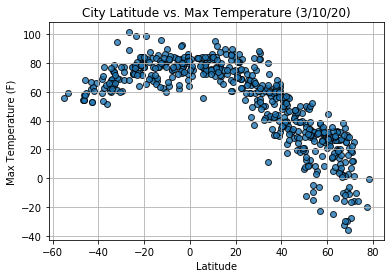

In [8]:
# Create a Scatter Plot for max temperature vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvTemp.png")
plt.show()

The above code displays a scatterplot with data points that represent the max temperature and latitude of every city in the cities_df data frame on March 10, 2020. The scatterplot shows that max temperature for cities decreased the farther away that city is from the equator.

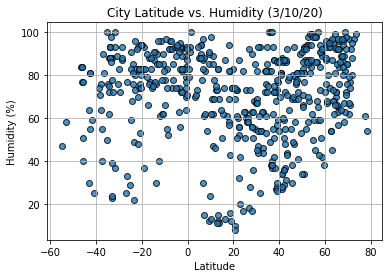

In [9]:
# Create a Scatter Plot for humidity vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvHum.png")
plt.show()

The above code displays a scatterplot with data points that represent the humidity percentage and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. The scatterplot shows that there does not appear to be much of a relationship between humidity and latitude.

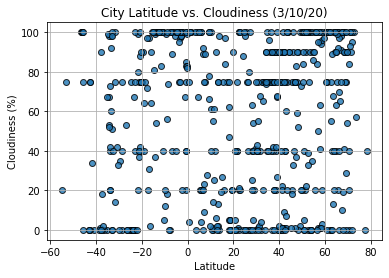

In [10]:
# Create a Scatter Plot for cloudiness vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvCloud.png")
plt.show()

The above code displays a scatterplot with data points that represent the cloudiness and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, it is difficult to ascertain a relationship between cloudiness and latitude, but it does appear that cloudiness percentages tend to be in increments of 20.

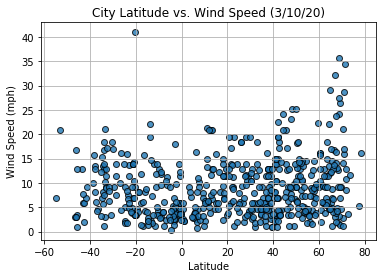

In [11]:
# Create a Scatter Plot for wind speed vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvWind.png")
plt.show()

The above code displays a scatterplot with data points that represent the wind speed and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, we can determine that wind speed appears to increase very slightly when a city's latitude increases past about 40 degrees north.

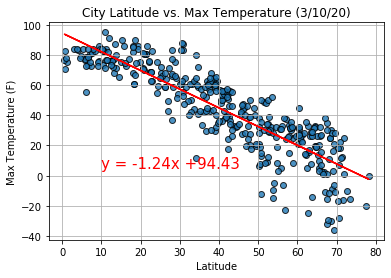

The r-squared is: -0.8679448481115188


In [12]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/NorthLatvTemp.png")
plt.show()
print(f"The r-squared is: {rvalue}")

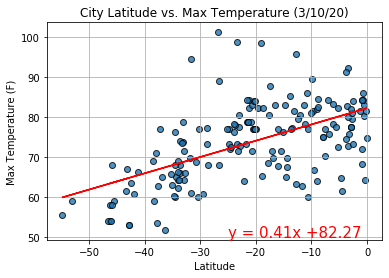

The r-squared is: 0.5657252652663194


In [13]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/SouthLatvTemp.png")
plt.show()
print(f"The r-squared is: {rvalue}")

While the max temperature increases the closer a city is in both hemispheres, the relationship between latitude and max temperature is much stronger in the northern hemisphere than the southern hemisphere.

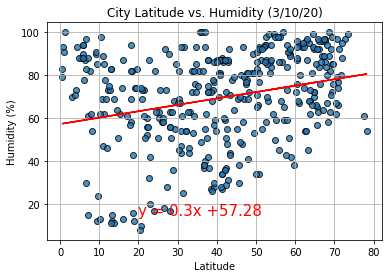

The r-squared is: 0.2685063236570595


In [14]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/NorthLatvHum.png")
plt.show()
print(f"The r-squared is: {rvalue}")

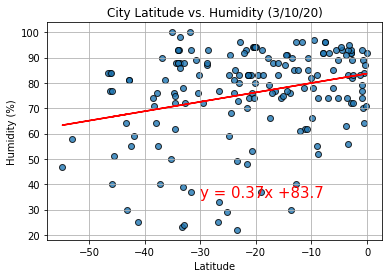

The r-squared is: 0.27786467558304717


In [15]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/SouthLatvHum.png")
plt.show()
print(f"The r-squared is: {rvalue}")

Linear regression tell us that, in the northern hemisphere, a city's humidity percentage actually increases the farther north it is from the equator. Meanwhile, in the southern hemisphere, a city's humitidy percentage decreases the farther south it is from the equator. However, the relationship between latitude and humidity is not particularly strong in either hemisphere. 

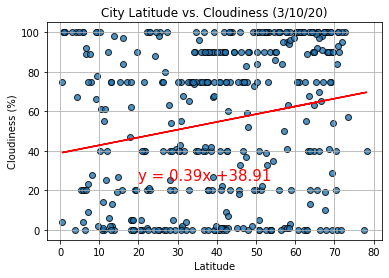

The r-squared is: 0.20226749229690624


In [16]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/NorthLatvCloud.png")
plt.show()
print(f"The r-squared is: {rvalue}")

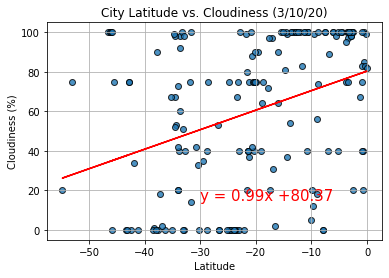

The r-squared is: 0.35412638879272257


In [17]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/SouthLatvCloud.png")
plt.show()
print(f"The r-squared is: {rvalue}")

The relationship between cloudiness and latitude is not very strong in either hemisphere. However, cloudiness in the southern hemisphere generally does decrease in cities farther from the equator, while in the northern hemisphere, the cloudiness increases the farther from the equator the cities are. 

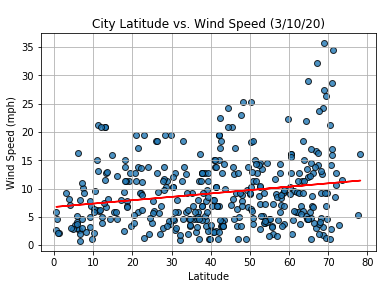

The r-squared is: 0.19215878242428053


In [18]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/NorthLatvWind.png")
plt.show()
print(f"The r-squared is: {rvalue}")

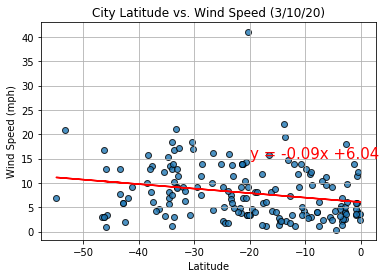

The r-squared is: -0.22530869687237684


In [19]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.grid()
plt.savefig("../WeatherPy/Images/SouthLatvWind.png")
plt.show()
print(f"The r-squared is: {rvalue}")

Again, there is only a very weak relationship between wind speed and latitude in both hemispheres. Generally, wind speed increases in both hemispheres the farther away a city is from the equator.

Overall Takeaways: 

1. The city variable with the greatest relationship with latitude is max temperature. Temperatures rise as you move closer to the equator
2. In the northern hemisphere, humidity and max temperature are not positively correlated. It appears that as a max temperature increases, humidity decreases slightly in the northern hempisphere - at least in March. 
3. One observation that could impact the outcome of this data analysis is that there are significantly more northern hemisphere cities than southern hemisphere cities. Therefore, the southern hemisphere conclusions may be slightly less reliable than the conclusions regarding the northern hemisphere. 